In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Load the dataset
from google.colab import files
uploaded = files.upload()

df = pd.read_csv(next(iter(uploaded)))


Saving kidney.csv to kidney.csv


In [ ]:
# Display the first few rows
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
# Drop ID column if it exists
if 'id' in df.columns:
    df.drop(columns=['id'], inplace=True)

# Convert object columns (stored as text) to numeric where needed
numeric_cols = ['pcv', 'wc', 'rc']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Standardizing categorical values (strip spaces, convert to lowercase)
cat_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
for col in cat_cols:
    df[col] = df[col].astype(str).str.strip().str.lower()



In [ ]:
# Fix inconsistencies in target variable
df['classification'] = df['classification'].astype(str).str.strip().str.lower()
df['classification'] = df['classification'].replace({'ckd': 1, 'notckd': 0})

<ipython-input-5-892ef9ae5d32>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['classification'] = df['classification'].replace({'ckd': 1, 'notckd': 0})


In [ ]:
# Handling missing values
df.fillna(df.median(numeric_only=True), inplace=True)  # Fill numeric columns with median
df.fillna(df.mode().iloc[0], inplace=True)  # Fill categorical columns with mode


In [ ]:
# Save cleaned dataset
cleaned_file_path = "/content/kidney_cleaned.csv"
df.to_csv(cleaned_file_path, index=False)


In [ ]:
# Display cleaned dataset info
print("Data Cleaning Complete. Cleaned dataset saved as 'kidney_cleaned.csv'")
df.info()
df.head()


Data Cleaning Complete. Cleaned dataset saved as 'kidney_cleaned.csv'
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   rbc             400 non-null    object 
 6   pc              400 non-null    object 
 7   pcc             400 non-null    object 
 8   ba              400 non-null    object 
 9   bgr             400 non-null    float64
 10  bu              400 non-null    float64
 11  sc              400 non-null    float64
 12  sod             400 non-null    float64
 13  pot             400 non-null    float64
 14  hemo            400 non-null    float64
 15  pcv             400 non-null    float64
 16  wc        

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,nan,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,1
1,7.0,50.0,1.020,4.0,0.0,nan,normal,notpresent,notpresent,121.0,...,38.0,6000.0,4.8,no,no,no,good,no,no,1
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,4.8,no,yes,no,poor,no,yes,1
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,1
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,1


In [ ]:
#Feature Encoding & Data Splitting

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [ ]:

# Load cleaned dataset
df = pd.read_csv('/content/kidney_cleaned.csv')

In [ ]:
# Identify categorical columns that need encoding
cat_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']


In [ ]:
# Apply Label Encoding to categorical features
label_encoder = LabelEncoder()
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])



In [ ]:
# Define features (X) and target (y)
X = df.drop(columns=['classification'])  # Independent variables
y = df['classification']  # Target variable


In [ ]:
# Split dataset into Training (80%) and Testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# Display the shape of the training and testing sets
print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")

Training Data Shape: (320, 24)
Testing Data Shape: (80, 24)


In [ ]:
# Google Colab: Train and Evaluate Predictive Models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

In [ ]:
# Load cleaned dataset
df = pd.read_csv('/content/kidney_cleaned.csv')

In [ ]:
# Identify categorical columns that need encoding
cat_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

In [ ]:
# Apply Label Encoding to categorical features
label_encoder = LabelEncoder()
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [ ]:
# Define features (X) and target (y)
X = df.drop(columns=['classification'])  # Independent variables
y = df['classification']  # Target variable

In [ ]:
# Split dataset into Training (80%) and Testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Train Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
# Train Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred_log = log_reg.predict(X_test)
y_pred_rf = rf.predict(X_test)

In [ ]:
# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    print(f"\nEvaluation for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

In [ ]:
# Evaluate Logistic Regression
evaluate_model(y_test, y_pred_log, "Logistic Regression")


Evaluation for Logistic Regression:
Accuracy: 0.9250
Precision: 0.9400
Recall: 0.9400

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        30
           1       0.94      0.94      0.94        50

    accuracy                           0.93        80
   macro avg       0.92      0.92      0.92        80
weighted avg       0.93      0.93      0.93        80



In [ ]:
# Evaluate Random Forest
evaluate_model(y_test, y_pred_rf, "Random Forest")


Evaluation for Random Forest:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        50

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [ ]:
# Confusion Matrix Visualization
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not CKD", "CKD"], yticklabels=["Not CKD", "CKD"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

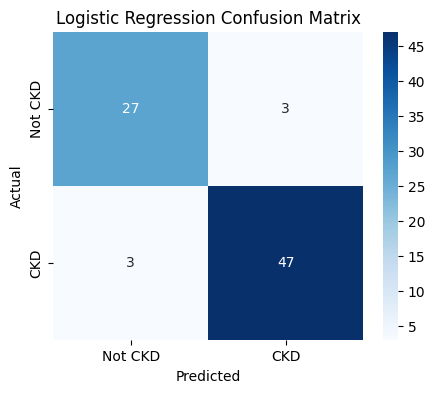

In [ ]:
# Plot Confusion Matrix for Logistic Regression
plot_confusion_matrix(y_test, y_pred_log, "Logistic Regression Confusion Matrix")

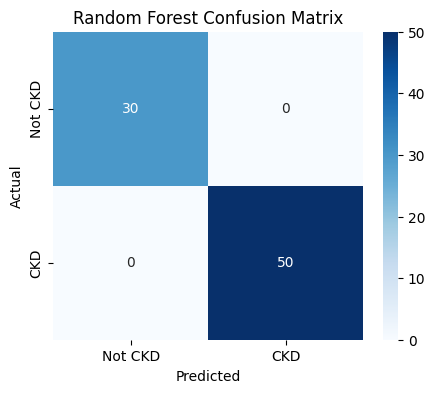

In [ ]:
# Plot Confusion Matrix for Random Forest
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest Confusion Matrix")

In [ ]:
# 4️⃣ Predict on New Data
new_data = np.array([[50, 80, 1.020, 2, 0, 0, 1, 0, 0, 120, 35, 1.2, 135, 4.5, 12, 40, 8000, 4.5, 1, 1, 0, 0, 0, 0]])  # Example patient data
new_pred_rf = rf.predict(new_data)
new_pred_log = log_reg.predict(new_data)

print("\n🔹 New Patient Prediction (Random Forest):", "CKD" if new_pred_rf[0] == 1 else "Not CKD")
print("🔹 New Patient Prediction (Logistic Regression):", "CKD" if new_pred_log[0] == 1 else "Not CKD")



🔹 New Patient Prediction (Random Forest): CKD
🔹 New Patient Prediction (Logistic Regression): CKD


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
